<a href="https://colab.research.google.com/github/dcdlima/DL-with-python/blob/main/DL_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Primeiramente deve-se criar os tensores para realizar os cálculos necessários
All one or All zeros tensors

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


### Pode-se criar tensores de valores aleatórios

In [3]:
x = tf.random.normal(shape=(3,1),mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[-0.22348645]
 [ 0.14697827]
 [-1.5301124 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1),minval=0.,maxval=1.)
print(x)

tf.Tensor(
[[0.1792475 ]
 [0.15691113]
 [0.05836856]], shape=(3, 1), dtype=float32)


### Diferentemente dos arrays no Numpy não se pode atribuir valores aos tensores no TensorFlow

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [6]:
### não é possível atribuir valores no tensor - comentado todas as linhas para não atrapalhar a inicialização do ambiente de execução

#x = tf.ones(shape=(2, 2))
#x[0, 0] = 0.
#print(x)


In [7]:
### Criando uma variável TensorFlow

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.505968  ],
       [ 0.02727216],
       [-0.37165144]], dtype=float32)>


In [8]:
### atribuindo valores a uma variável TensorFlow

v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
### atribuindo valor a um subconjunto da variável TensorFlow
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
### utilizando assign_add()
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [11]:
### Operações com Tensores

a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [12]:
### GradientTape API

input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [13]:
### GradientTape com entradas de tensor constante

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [14]:
### GradientTapes aninhados para calcular gradientes de segunda ordem

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>

## Implementando um classificador linear com Tensor Flow


In [15]:
### Criação de dados sintéticos
### gerando duas classes de pontos aleatórios em um plano 2D

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [16]:
### Acomodando as duas classes em um array (2000, 2)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
### gerando os targets correspondentes (0 e 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

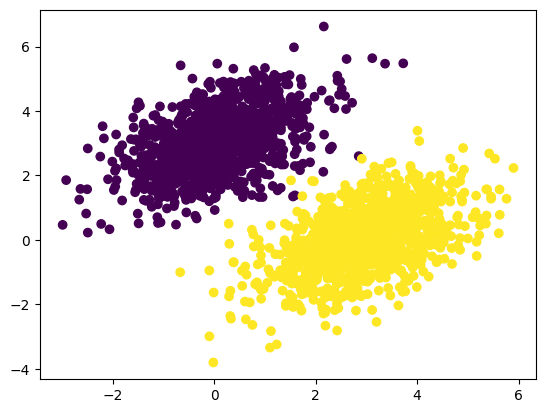

In [18]:
### Plotando os dados com matplotlib

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [19]:
### Criando as variáveis do classificador linear

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [20]:
### Função foward pass

def model(inputs):
    return tf.matmul(inputs, W) + b




In [21]:
### MSE função custo

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [22]:
### função etapa de treinamento

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

Loss at step 0: 2.7792
Loss at step 1: 0.3775
Loss at step 2: 0.1570
Loss at step 3: 0.1193
Loss at step 4: 0.1076
Loss at step 5: 0.1001
Loss at step 6: 0.0937
Loss at step 7: 0.0879
Loss at step 8: 0.0826
Loss at step 9: 0.0778
Loss at step 10: 0.0733
Loss at step 11: 0.0693
Loss at step 12: 0.0656
Loss at step 13: 0.0622
Loss at step 14: 0.0591
Loss at step 15: 0.0562
Loss at step 16: 0.0537
Loss at step 17: 0.0513
Loss at step 18: 0.0491
Loss at step 19: 0.0471
Loss at step 20: 0.0453
Loss at step 21: 0.0437
Loss at step 22: 0.0422
Loss at step 23: 0.0408
Loss at step 24: 0.0395
Loss at step 25: 0.0384
Loss at step 26: 0.0373
Loss at step 27: 0.0363
Loss at step 28: 0.0354
Loss at step 29: 0.0346
Loss at step 30: 0.0339
Loss at step 31: 0.0332
Loss at step 32: 0.0326
Loss at step 33: 0.0320
Loss at step 34: 0.0315
Loss at step 35: 0.0310
Loss at step 36: 0.0306
Loss at step 37: 0.0302
Loss at step 38: 0.0299
Loss at step 39: 0.0295


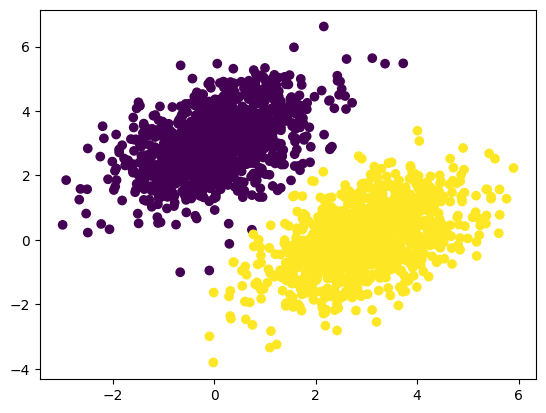

In [23]:
### loop to treinamento da batelada

for step in range(40):
  loss = training_step(inputs, targets)
  print(f'Loss at step {step}: {loss:.4f}')

predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()

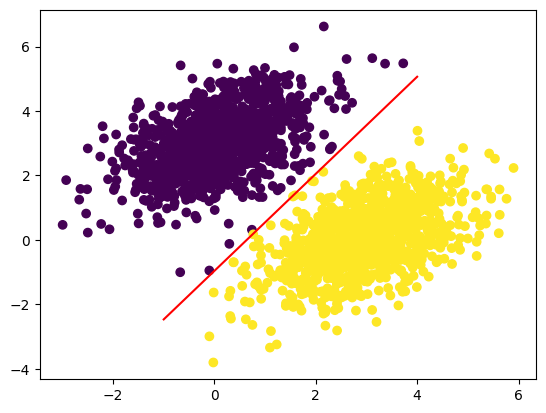

In [24]:
### desenhar uma linha para melhor visualização da classificação

x = np.linspace (-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()

### Loading the IMDB Dataset

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [27]:
train_labels[0]

np.int64(1)

In [28]:
### restringimos os dados a 10000 por isso nenhum valor excederá a ele.

max([max(sequence) for sequence in train_data])

9999

In [29]:
###decodificando os reviews de volta para texto

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join ([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
### Multihot encoding para sequencia de intengers - aqui está ocorrendo a vetorização dos dados

import numpy as np
def vectorize_sequences (sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [31]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
### também é necessário vetorizar os rótulos

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


Após as etapas realizadas anteriormente os dados estão prontos para serem aplicados em uma rede neural.
Abaixo um exemplo de um modelo.


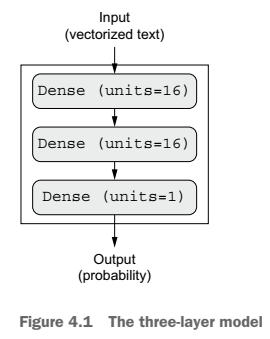

Extraído do livro Deep Learning With Python

In [33]:
### Definição do modelo

from tensorflow import keras
from tensorflow.keras import layers

### 2 camadas intermediárias de 16 unidades e uma camada de saída com 1 unidade

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [34]:
### loss function and optimizer
### como estamos trabalhando com um modelo cujo saída é uma probabilidade a escolha adequada é binary_crossentropy
### Optimizer será o rmsprop que é bom para praticamente todos os casos

### Compilando o modelo

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])



In [35]:
### Validando a abordagem

### Configurando o conjunto de validação

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
### treinando o modelo

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.4910 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5011 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4950 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5021 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5083 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5057 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4948 -

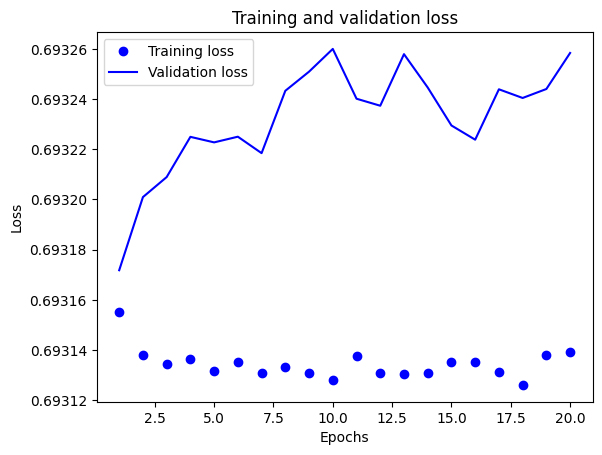

In [37]:
### Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

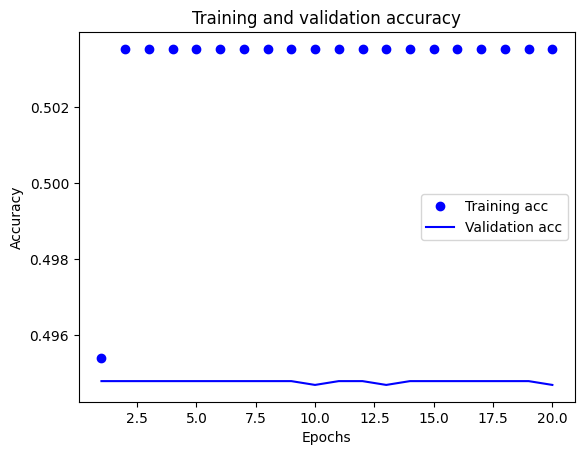

In [38]:
### plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
### Retreinando um modelo do zero

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5021 - loss: 0.6931
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5007 - loss: 0.6932
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5001 - loss: 0.6932
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4976 - loss: 0.6932
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4930 - loss: 0.6932


In [40]:
### o primeiro número representa the test loss e o segundo the test accuracy

results

[0.6931489706039429, 0.5000399947166443]

In [41]:
### usando um modelo treinando para fazer predições em novos dados

model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.49842107],
       [0.5010366 ],
       [0.5010366 ],
       ...,
       [0.5010366 ],
       [0.5010366 ],
       [0.5010366 ]], dtype=float32)

In [42]:
### Classificação Multi classes

### Carregando o conjunto de dados da Reuters

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [43]:
###tamanho do conjunto de treinamento

len(train_data)

8982

In [44]:
### tamanho do conjunto de teste

len(test_data)

2246

In [45]:
### word index - os exemplos são uma lista de integers

train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [46]:
### Decodificando os inteiros pra texto

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])


550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [47]:
train_labels[10]

np.int64(3)

In [48]:
### Encoding the input data
### vectorização

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [49]:
### encoding com o método one-hot

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [50]:
### fazendo o one-hot no Keras

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [51]:
### Construindo o modelo

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [52]:
### compilando o modelo
### para esse caso a melhor loss function é categorical crossentropy

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])


In [53]:
### configurando o conjunto de validação

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [54]:
### treinando o modelo

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.1082 - loss: 3.8185 - val_accuracy: 0.2220 - val_loss: 3.7979
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.2088 - loss: 3.7925 - val_accuracy: 0.2220 - val_loss: 3.7770
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2151 - loss: 3.7720 - val_accuracy: 0.2220 - val_loss: 3.7570
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2194 - loss: 3.7517 - val_accuracy: 0.2220 - val_loss: 3.7372
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2171 - loss: 3.7325 - val_accuracy: 0.2220 - val_loss: 3.7177
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.2171 - loss: 3.7127 - val_accuracy: 0.2220 - val_loss: 3.6983
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2193 - loss: 3.6934 - val_accuracy: 0.2220 - val_loss: 3.6790
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2239 - loss: 3.6724 - val_accuracy: 0.3530 - 

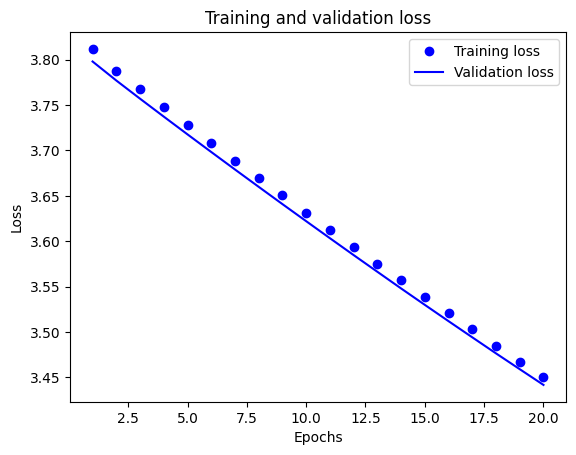

In [55]:
### plotting the training and validation loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

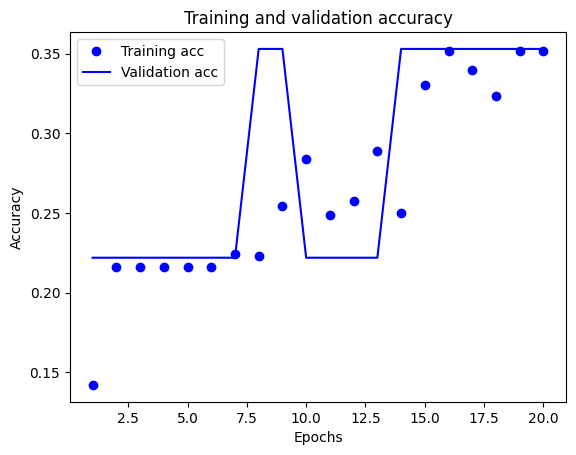

In [56]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
### retreinando o modelo do zero

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2868 - loss: 3.8048 - val_accuracy: 0.3540 - val_loss: 3.7220
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3519 - loss: 3.6870 - val_accuracy: 0.3540 - val_loss: 3.5603
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3454 - loss: 3.5109 - val_accuracy: 0.3540 - val_loss: 3.3259
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3533 - loss: 3.2647 - val_accuracy: 0.3540 - val_loss: 3.0357
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3444 - loss: 2.9750 - val_accuracy: 0.3540 - val_loss: 2.7459
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3514 - loss: 2.6903 - val_accuracy: 0.3540 - val_loss: 2.5277
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3487 - loss: 2.5134 - val_accuracy: 0.3540 - val_loss: 2.4271
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3567 - loss: 2.4215 - val_accuracy: 0.3540 - val_loss:

[2.4250481128692627, 0.36197686195373535]

In [58]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.18744434550311664)

In [59]:
### gerando predições em novos dados

predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [60]:
predictions[0].shape

(46,)

In [61]:
np.sum(predictions[0])

np.float32(1.0)

In [62]:
### A classe com maior probabilidade

np.argmax(predictions[0])

np.int64(3)

In [63]:
### uma forma diferente de manusear rótulos e loss function

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [64]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [65]:
### modelo com gargalho. Que merda acontece quando o tamanho da camada intermediária é muito menor que a saída

model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.1068 - loss: 3.8012 - val_accuracy: 0.2230 - val_loss: 3.7416
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2222 - loss: 3.7237 - val_accuracy: 0.2230 - val_loss: 3.6678
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2382 - loss: 3.6501 - val_accuracy: 0.3540 - val_loss: 3.5963
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3488 - loss: 3.5785 - val_accuracy: 0.3540 - val_loss: 3.5266
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.3500 - loss: 3.5093 - val_accuracy: 0.3540 - val_loss: 3.4591
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3560 - loss: 3.4394 - val_accuracy: 0.3540 - val_loss: 3.3937
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3516 - loss: 3.3747 - val_accuracy: 0.3540 - val_loss: 3.3308
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3514 - loss: 3.3163 - val_accuracy: 0.3540 - v

In [66]:
### Predição de preços de casas: um exemplo de regressão

from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [67]:
train_data.shape

(404, 13)

In [68]:
test_data.shape

(102, 13)

In [69]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [70]:
### preparando os dados
### normalizar os dados em alguns casos é necessário para que seja possível realizar o treinamento

### Normalizando os dados

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [71]:
### Construindo o modelo

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) #sem função de ativação será uma camada linear
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [72]:
### K-fold validation

k = 4 ### número de folds
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range (k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [73]:
all_scores

[2.1240999698638916, 2.424003839492798, 2.5832700729370117, 2.4585886001586914]

In [74]:
np.mean(all_scores)

np.float64(2.397490620613098)

In [75]:
### Salvando os logs de validação para cada fold

num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [76]:
### construindo o histórico de médias sucessivas dos scores de validação k-fold

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

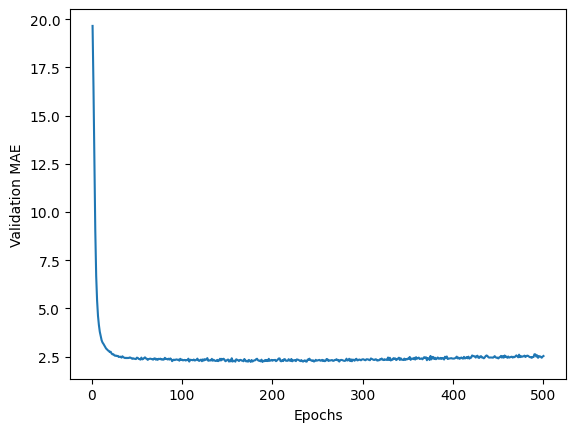

In [77]:
### ploting validation scores

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

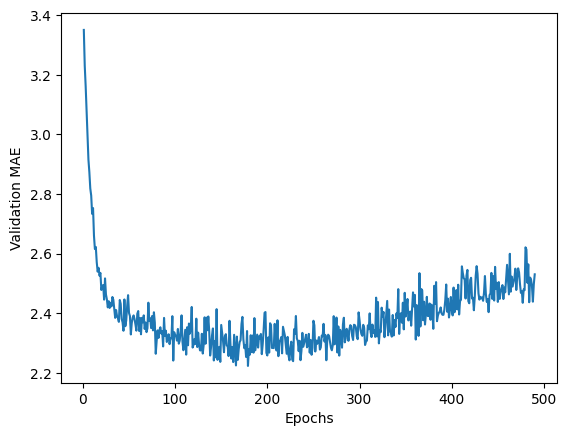

In [78]:
### Plotando os scores de validação excluindo os 10 primeiros pontos de dados para ajuste de escala

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [79]:
### treinando o modelo final


model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8094 - mae: 2.1765 


In [80]:
test_mae_score

2.3721816539764404

In [81]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([9.060679], dtype=float32)

In [82]:
### Ruídos nos dados

### Adicionando canais de ruído branco ao MNIST (dataset clássico de identificação de dígitos)

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis = 1)
train_images_with_zero_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis = 1)

In [83]:
### Treinando o mesmo modelo com sinais de ruído

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zero_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)




Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6966 - loss: 1.0508 - val_accuracy: 0.9025 - val_loss: 0.3175
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9122 - loss: 0.2802 - val_accuracy: 0.9394 - val_loss: 0.2076
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9466 - loss: 0.1782 - val_accuracy: 0.9502 - val_loss: 0.1648
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9618 - loss: 0.1184 - val_accuracy: 0.9588 - val_loss: 0.1345
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9728 - loss: 0.0880 - val_accuracy: 0.9610 - val_loss: 0.1354
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9807 - loss: 0.0615 - val_accuracy: 0.9641 - val_loss: 0.1219
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9871 - loss: 0.0420 - val_accuracy: 0.9652 - val_loss: 0.1252
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9893 - loss: 0.0342 - val_

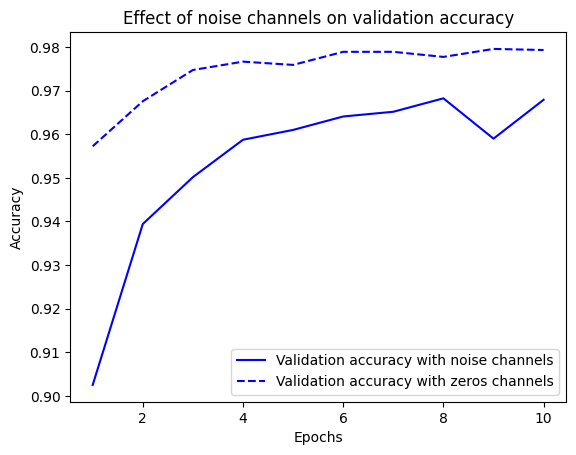

In [84]:
import matplotlib.pyplot as plt
val_acc = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


## Os modelos de deep learning podem ser encaixados em praticamente qualquer coisa, desde que tenham poder representacional suficiente.

In [85]:
### acomodando um modelo MNIST com rótulos embaralhado aleatoriamente

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split = 0.2)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1037 - loss: 2.3332 - val_accuracy: 0.1040 - val_loss: 2.3064
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1198 - loss: 2.2968 - val_accuracy: 0.1005 - val_loss: 2.3112
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1305 - loss: 2.2889 - val_accuracy: 0.1032 - val_loss: 2.3141
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1425 - loss: 2.2763 - val_accuracy: 0.1020 - val_loss: 2.3312
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1536 - loss: 2.2598 - val_accuracy: 0.1048 - val_loss: 2.3314
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1674 - loss: 2.2403 - val_accuracy: 0.1006 - val_loss: 2.3550
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1833 - loss: 2.2160 - val_accuracy: 0.0982 - val_loss: 2.3604
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1992 - loss: 2.1872 - 

### Models evaluation
##### Simple holdout validation

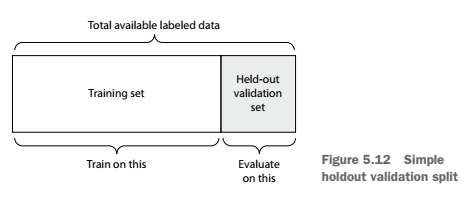


In [86]:
### Holdout validation

num_validation_samples = 10000
np.random.shuffle(data)  # Embaralha os dados para que a separação seja aleatória

# Separa os dados de validação e treinamento
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]

# Separa as features e os rótulos do conjunto de treinamento
x_train = np.array([sample[0] for sample in training_data])
y_train = np.array([sample[1] for sample in training_data])

# Separa as features e os rótulos do conjunto de validação
x_val = np.array([sample[0] for sample in validation_data])
y_val = np.array([sample[1] for sample in validation_data])

# Cria o modelo e treina usando os dados de treinamento
model = get_model()
model.fit(x_train, y_train, epochs=10, batch_size=32)  # você pode ajustar epochs e batch_size conforme necessário

# Avalia o modelo no conjunto de validação
validation_score = model.evaluate(x_val, y_val)

# Após a validação, re-treina o modelo utilizando a junção dos dados de treinamento e validação
x_full_train = np.concatenate([x_train, x_val])
y_full_train = np.concatenate([y_train, y_val])

model = get_model()  # Cria um novo modelo (ou reinicializa o existente)
model.fit(x_full_train, y_full_train, epochs=10, batch_size=32)

# Supondo que test_data esteja no mesmo formato (lista de tuplas (x, y)):
x_test = np.array([sample[0] for sample in test_data])
y_test = np.array([sample[1] for sample in test_data])
test_score = model.evaluate(x_test, y_test)


NameError: name 'data' is not defined